In [61]:
import pandas as pd
import numpy as np
import folium
import math
import datetime as dt
import glob
from ipywidgets import interact, widgets
import geopandas as gpd
from shapely.geometry import Point
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdate
import seaborn as sbn
import scipy.stats as st
pd.set_option('precision', 1) #be careful because this also applies to lat long
# global settings for the charts
#plt.rcParams['font.family'] = 'FreeSerif'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.fontsize'] = 18

In [33]:
acidentes2018 = pd.read_csv('../incidentes/acidentes-por-radar-2018.csv')
acidentes2018.n_acidentes25 = acidentes2018.n_acidentes25.astype(int)
acidentes2018.n_acidentes50 = acidentes2018.n_acidentes50.astype(int)
acidentes2018.n_acidentes100 = acidentes2018.n_acidentes100.astype(int)
acidentes2018.n_acidentes250 = acidentes2018.n_acidentes250.astype(int)
acidentes2018.n_acidentes500 = acidentes2018.n_acidentes500.astype(int)
acidentes2018.n_acidentes1000 = acidentes2018.n_acidentes1000.astype(int)
acidentes2018.n_acidentes2000 = acidentes2018.n_acidentes2000.astype(int)
acidentes2018.drop(acidentes2018.columns[0],axis=1,inplace=True)
acidentes2018.set_index('id_radar',inplace=True)
acidentes2018.append(acidentes2018.sum().rename('total'))

acidentes2017 = pd.read_csv('../incidentes/acidentes-por-radar-2017.csv')
acidentes2017.n_acidentes25 = acidentes2017.n_acidentes25.astype(int)
acidentes2017.n_acidentes50 = acidentes2017.n_acidentes50.astype(int)
acidentes2017.n_acidentes100 = acidentes2017.n_acidentes100.astype(int)
acidentes2017.n_acidentes250 = acidentes2017.n_acidentes250.astype(int)
acidentes2017.n_acidentes500 = acidentes2017.n_acidentes500.astype(int)
acidentes2017.n_acidentes1000 = acidentes2017.n_acidentes1000.astype(int)
acidentes2017.n_acidentes2000 = acidentes2017.n_acidentes2000.astype(int)
acidentes2017.drop(acidentes2017.columns[0],axis=1,inplace=True)
acidentes2017.set_index('id_radar',inplace=True)
acidentes2017.append(acidentes2017.sum().rename('total'))

acidentes2016 = pd.read_csv('../incidentes/acidentes-por-radar-2016.csv')
acidentes2016.n_acidentes25 = acidentes2016.n_acidentes25.astype(int)
acidentes2016.n_acidentes50 = acidentes2016.n_acidentes50.astype(int)
acidentes2016.n_acidentes100 = acidentes2016.n_acidentes100.astype(int)
acidentes2016.n_acidentes250 = acidentes2016.n_acidentes250.astype(int)
acidentes2016.n_acidentes500 = acidentes2016.n_acidentes500.astype(int)
acidentes2016.n_acidentes1000 = acidentes2016.n_acidentes1000.astype(int)
acidentes2016.n_acidentes2000 = acidentes2016.n_acidentes2000.astype(int)
acidentes2016.drop(acidentes2016.columns[0],axis=1,inplace=True)
acidentes2016.set_index('id_radar',inplace=True)
acidentes2016.append(acidentes2016.sum().rename('total'))

,n_acidentes25,n_acidentes50,n_acidentes100,n_acidentes250,n_acidentes500,n_acidentes1000,n_acidentes2000
id_radar,,,,,,,
2,1,2,2,2,4,11,16
194,1,1,1,2,3,4,12
227,1,1,1,3,3,6,14
303,1,1,1,3,12,25,63
355,1,1,1,1,2,11,35
360,1,1,1,2,3,10,32
361,1,1,1,1,4,14,56
481,5,5,5,6,7,11,33
546,1,1,2,2,6,15,49


In [69]:
acidentes_sum = pd.DataFrame(columns=['year','25m','50m','100m','250m','500m','1000m','2000m']) 
acidentes_sum.loc[0]=[2016,acidentes2016.sum()[0],acidentes2016.sum()[1],acidentes2016.sum()[2],acidentes2016.sum()[3],acidentes2016.sum()[4],acidentes2016.sum()[5],acidentes2016.sum()[6]]#.rename('total'))#,ignore_index=True)
acidentes_sum.loc[1]=[2017,acidentes2017.sum()[0],acidentes2017.sum()[1],acidentes2017.sum()[2],acidentes2017.sum()[3],acidentes2017.sum()[4],acidentes2017.sum()[5],acidentes2017.sum()[6]]#.rename('total'))#,ignore_index=True)
acidentes_sum.loc[2]=[2018,acidentes2018.sum()[0],acidentes2018.sum()[1],acidentes2018.sum()[2],acidentes2018.sum()[3],acidentes2018.sum()[4],acidentes2018.sum()[5],acidentes2018.sum()[6]]#.rename('total'))#,ignore_index=True)
#acidentes_sum.year.astype(str)
acidentes_sum.set_index('year',inplace=True)
acidentes_sum.head()

,25m,50m,100m,250m,500m,1000m,2000m
year,,,,,,,
2016,21,49,137,566,1676,5849,22031
2017,4,19,86,340,1111,3957,14437
2018,15,39,103,356,1151,3948,14493


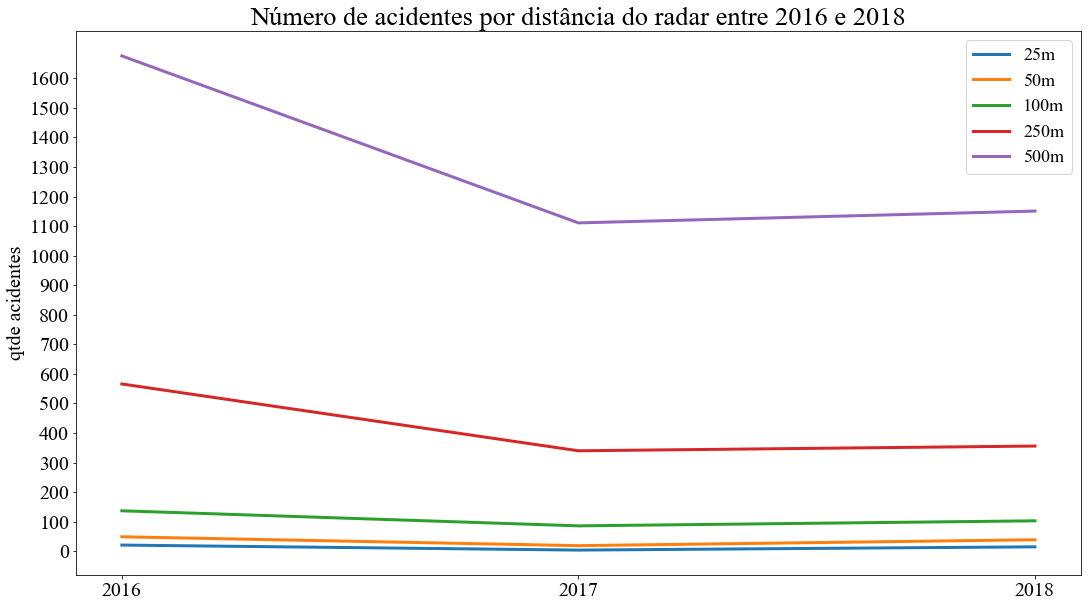

In [82]:
ax = plt.axes()
ax.figure.set_size_inches(18,10)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.plot(acidentes_sum['25m'],label='25m',linewidth=3)
ax.plot(acidentes_sum['50m'],label='50m',linewidth=3)
ax.plot(acidentes_sum['100m'],label='100m',linewidth=3)
ax.plot(acidentes_sum['250m'],label='250m',linewidth=3)
ax.plot(acidentes_sum['500m'],label='500m',linewidth=3)
plt.ylabel('qtde acidentes')
#plt.xticks(rotation=45)
plt.xticks(np.arange(2016,2019,step=1))
plt.yticks(np.arange(0,1700,step=100))
plt.legend(loc='upper right')
plt.title('Número de acidentes por distância do radar entre 2016 e 2018')
plt.savefig('acidentes-2016-2018.png', format='png', dpi=200)
plt.draw()

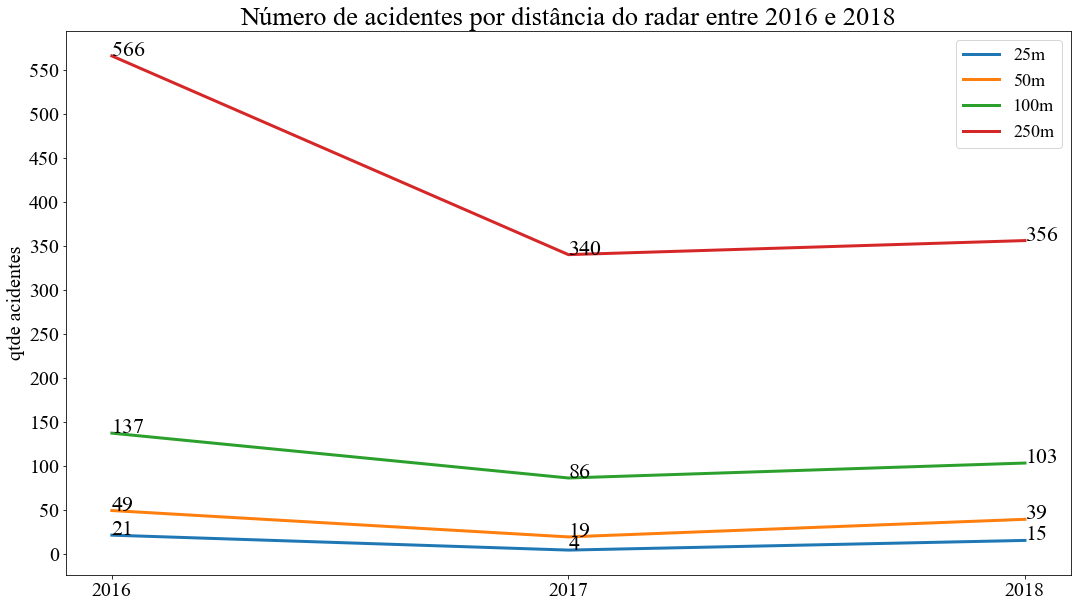

In [92]:
ax = plt.axes()
ax.figure.set_size_inches(18,10)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.plot(acidentes_sum['25m'],label='25m',linewidth=3)
ax.plot(acidentes_sum['50m'],label='50m',linewidth=3)
ax.plot(acidentes_sum['100m'],label='100m',linewidth=3)
ax.plot(acidentes_sum['250m'],label='250m',linewidth=3)
plt.ylabel('qtde acidentes')
#plt.xticks(rotation=45)
plt.xticks(np.arange(2016,2019,step=1))
plt.yticks(np.arange(0,600,step=50))
plt.legend(loc='upper right')
plt.title('Número de acidentes por distância do radar entre 2016 e 2018')
plt.savefig('acidentes-2016-2018-250m.png', format='png', dpi=200)
for i,j in acidentes_sum['25m'].items():
    ax.annotate(str(j),xy=(i,j))
for i,j in acidentes_sum['50m'].items():
    ax.annotate(str(j),xy=(i,j))
for i,j in acidentes_sum['100m'].items():
    ax.annotate(str(j),xy=(i,j))
for i,j in acidentes_sum['250m'].items():
    ax.annotate(str(j),xy=(i,j))
plt.draw()

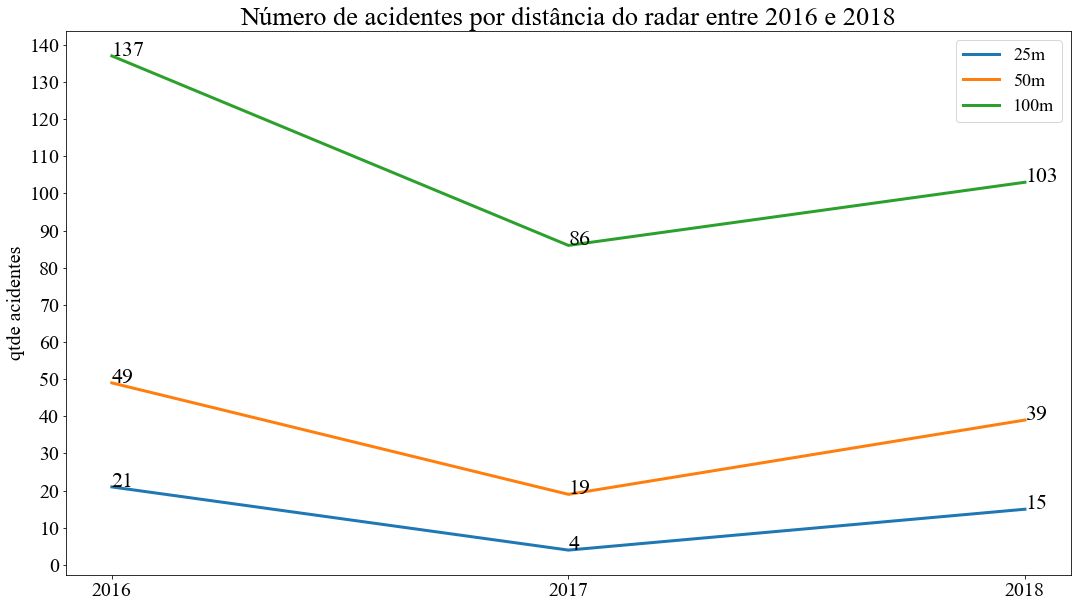

In [93]:
ax = plt.axes()
ax.figure.set_size_inches(18,10)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.plot(acidentes_sum['25m'],label='25m',linewidth=3)
ax.plot(acidentes_sum['50m'],label='50m',linewidth=3)
ax.plot(acidentes_sum['100m'],label='100m',linewidth=3)
plt.ylabel('qtde acidentes')
#plt.xticks(rotation=45)
plt.xticks(np.arange(2016,2019,step=1))
plt.yticks(np.arange(0,150,step=10))
plt.legend(loc='upper right')
plt.title('Número de acidentes por distância do radar entre 2016 e 2018')
plt.savefig('acidentes-2016-2018-100m.png', format='png', dpi=200)
for i,j in acidentes_sum['25m'].items():
    ax.annotate(str(j),xy=(i,j))
for i,j in acidentes_sum['50m'].items():
    ax.annotate(str(j),xy=(i,j))
for i,j in acidentes_sum['100m'].items():
    ax.annotate(str(j),xy=(i,j))
plt.draw()

In [ ]:
ax = plt.axes()
ax.figure.set_size_inches(18,10)
ax.set_axisbelow(True)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.plot(acidentes_sum['25m'],label='25m',linewidth=3)
ax.plot(acidentes_sum['50m'],label='50m',linewidth=3)
ax.plot(acidentes_sum['100m'],label='100m',linewidth=3)
ax.plot(acidentes_sum['250m'],label='250m',linewidth=3)
ax.plot(acidentes_sum['500m'],label='500m',linewidth=3)
ax.plot(acidentes_sum['1000m'],label='1000m',linewidth=3)
plt.ylabel('qtde acidentes')
#plt.xticks(rotation=45)
plt.xticks(np.arange(2016,2019,step=1))
plt.yticks(np.arange(0,1700,step=100))
plt.legend(loc='upper right')
plt.title('Número de acidentes por distância do radar entre 2016 e 2018')
plt.savefig('acidentes-bar-2016-2018.png', format='png', dpi=200)
plt.draw()

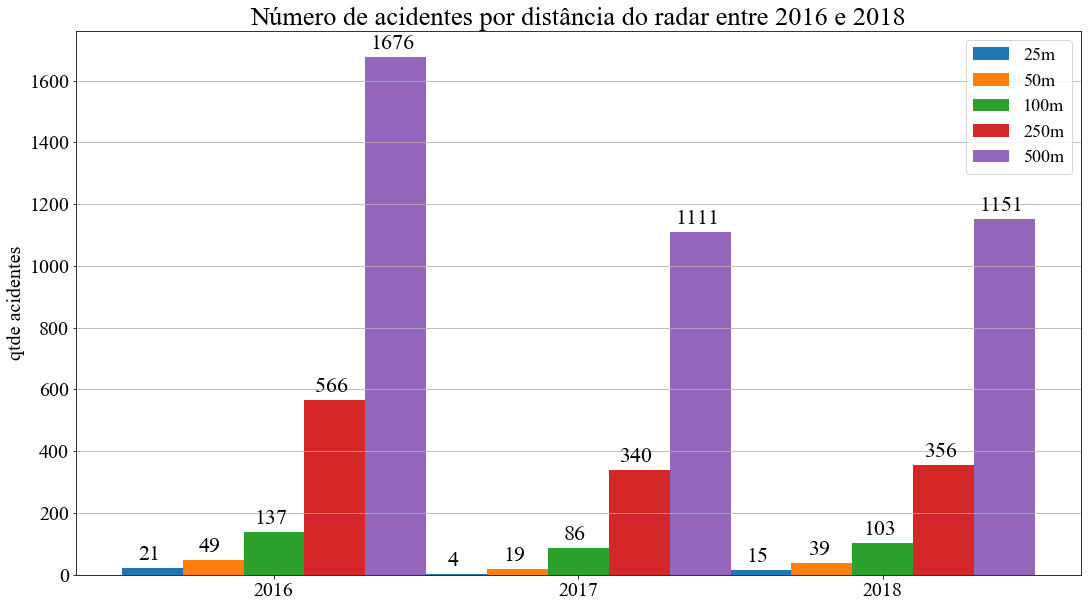

In [144]:
fig,ax_bar = plt.subplots()#(111)
ax_bar.figure.set_size_inches(18,10)
bar_width=0.2
x = np.arange(len(acidentes_sum))
rects1 = ax_bar.bar(x-0.4,acidentes_sum['25m'],label='25m',width=bar_width)
rects2 = ax_bar.bar(x-0.2,acidentes_sum['50m'],label='50m',width=bar_width)
rects3 = ax_bar.bar(x,acidentes_sum['100m'],label='100m',width=bar_width)
rects4 = ax_bar.bar(x+0.2,acidentes_sum['250m'],label='250m',width=bar_width)
rects5 = ax_bar.bar(x+0.4,acidentes_sum['500m'],label='500m',width=bar_width)
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(('2016','2017','2018'))
plt.ylabel('qtde acidentes')
plt.legend(loc='upper right')
plt.title('Número de acidentes por distância do radar entre 2016 e 2018')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax_bar.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 5, height),
                       xytext=(15,3),
                       textcoords='offset points',
                       ha='center',va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.savefig('acidentes-bar-2016-2018.png', format='png', dpi=200)
plt.draw()

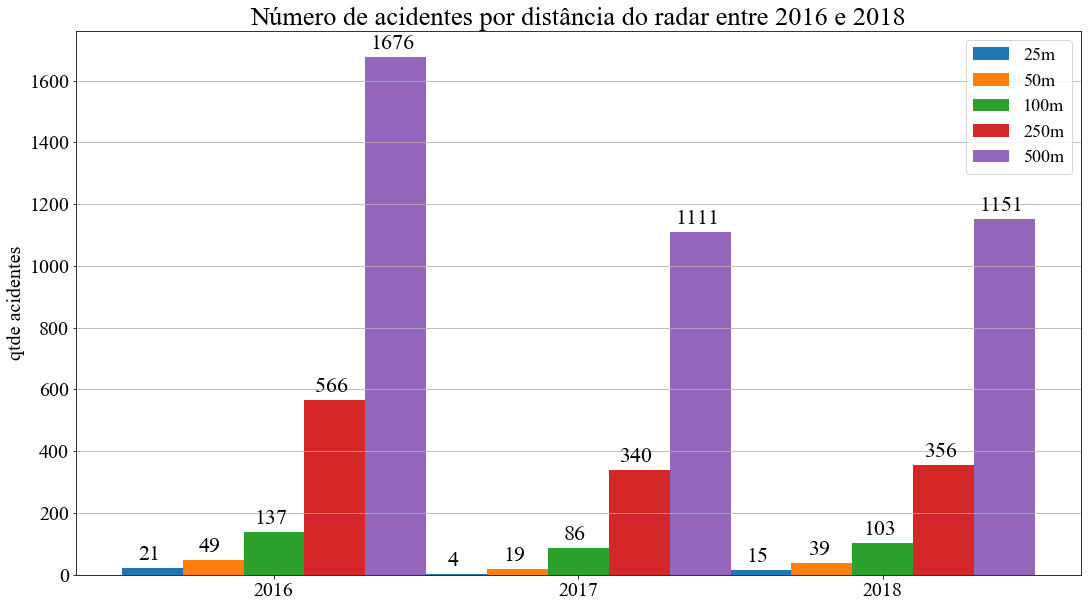

In [144]:
fig,ax_bar = plt.subplots()#(111)
ax_bar.figure.set_size_inches(18,10)
bar_width=0.2
x = np.arange(len(acidentes_sum))
rects1 = ax_bar.bar(x-0.4,acidentes_sum['25m'],label='25m',width=bar_width)
rects2 = ax_bar.bar(x-0.2,acidentes_sum['50m'],label='50m',width=bar_width)
rects3 = ax_bar.bar(x,acidentes_sum['100m'],label='100m',width=bar_width)
rects4 = ax_bar.bar(x+0.2,acidentes_sum['250m'],label='250m',width=bar_width)
rects5 = ax_bar.bar(x+0.4,acidentes_sum['500m'],label='500m',width=bar_width)
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(('2016','2017','2018'))
plt.ylabel('qtde acidentes')
plt.legend(loc='upper right')
plt.title('Número de acidentes por distância do radar entre 2016 e 2018')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax_bar.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 5, height),
                       xytext=(15,3),
                       textcoords='offset points',
                       ha='center',va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.savefig('acidentes-bar-2016-2018.png', format='png', dpi=200)
plt.draw()

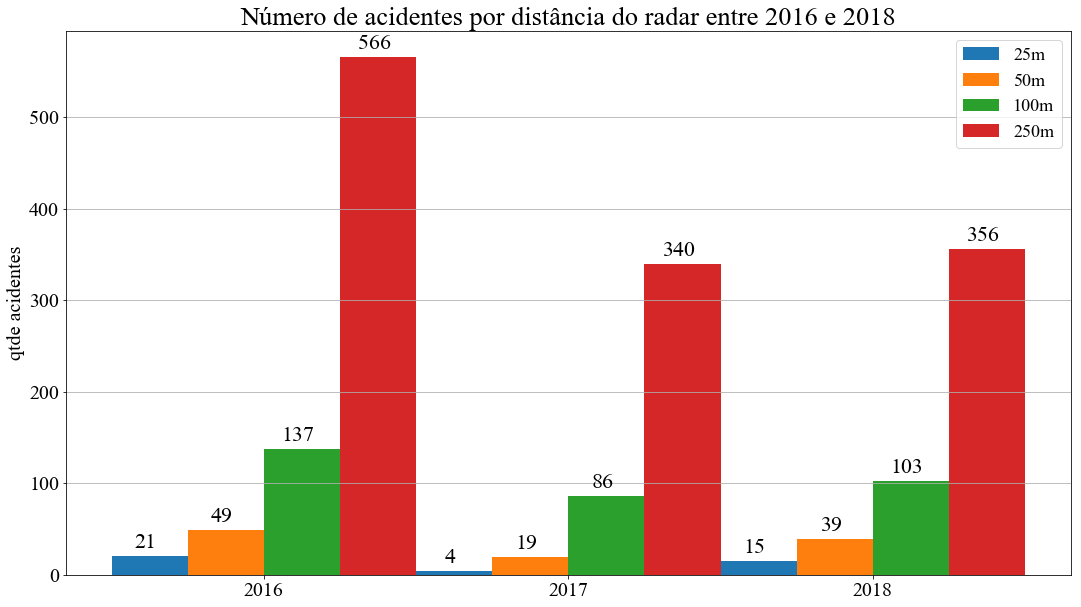

In [166]:
fig,ax_bar = plt.subplots()#(111)
ax_bar.figure.set_size_inches(18,10)
bar_width=0.25
x = np.arange(len(acidentes_sum))
rects1 = ax_bar.bar(x-0.375,acidentes_sum['25m'],label='25m',width=bar_width)
rects2 = ax_bar.bar(x-0.125,acidentes_sum['50m'],label='50m',width=bar_width)
rects3 = ax_bar.bar(x+0.125,acidentes_sum['100m'],label='100m',width=bar_width)
rects4 = ax_bar.bar(x+0.375,acidentes_sum['250m'],label='250m',width=bar_width)
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(('2016','2017','2018'))
plt.ylabel('qtde acidentes')
plt.legend(loc='upper right')
plt.title('Número de acidentes por distância do radar entre 2016 e 2018')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax_bar.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 4, height),
                       xytext=(15,3),
                       textcoords='offset points',
                       ha='center',va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.savefig('acidentes-bar-2016-2018-250m.png', format='png', dpi=200)
plt.draw()

In [163]:
acidentes_perc = pd.DataFrame(columns=['year','25m','50m','100m','250m','500m','total'])
tot_2016=1476
tot_2017=1042
tot_2018=1002
acidentes_perc.loc[0] = [2016,
                      round(acidentes_sum['25m'][2016]/tot_2016*100,1),
                     round(acidentes_sum['50m'][2016]/tot_2016*100,1),
                     round(acidentes_sum['100m'][2016]/tot_2016*100,1),
                     round(acidentes_sum['250m'][2016]/tot_2016*100,1),
                     round(acidentes_sum['500m'][2016]/tot_2016*100,1),
                     tot_2016] 
acidentes_perc.loc[1] = [2017,
                      round(acidentes_sum['25m'][2017]/tot_2017*100,1),
                     round(acidentes_sum['50m'][2017]/tot_2017*100,1),
                     round(acidentes_sum['100m'][2017]/tot_2017*100,1),
                     round(acidentes_sum['250m'][2017]/tot_2017*100,1),
                     round(acidentes_sum['500m'][2017]/tot_2017*100,1),
                     tot_2017] 
acidentes_perc.loc[3] = [2018,
                      round(acidentes_sum['25m'][2018]/tot_2018*100,1),
                     round(acidentes_sum['50m'][2018]/tot_2018*100,1),
                     round(acidentes_sum['100m'][2018]/tot_2018*100,1),
                     round(acidentes_sum['250m'][2018]/tot_2018*100,1),
                     round(acidentes_sum['500m'][2018]/tot_2018*100,1),
                     tot_2018] 

acidentes_perc.head()

,year,25m,50m,100m,250m,500m,total
0,2016.0,1.4,3.3,9.3,38.3,113.6,1476.0
1,2017.0,0.4,1.8,8.3,32.6,106.6,1042.0
3,2018.0,1.5,3.9,10.3,35.5,114.9,1002.0


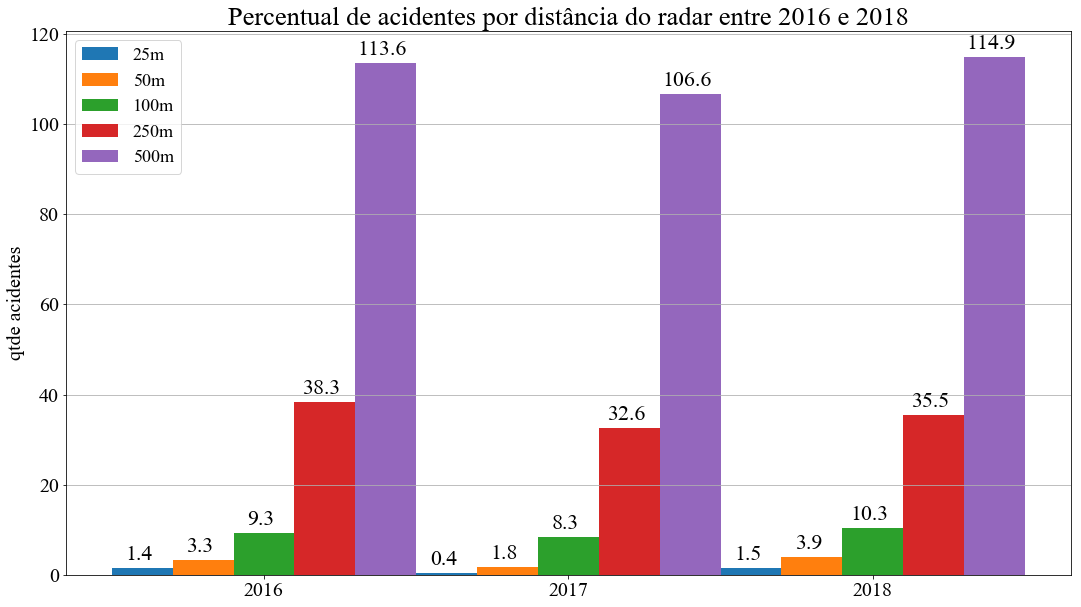

In [165]:
fig,ax_bar = plt.subplots()#(111)
ax_bar.figure.set_size_inches(18,10)
bar_width=0.2
x = np.arange(len(acidentes_sum))
rects1 = ax_bar.bar(x-0.4,acidentes_perc['25m'],label='25m',width=bar_width)
rects2 = ax_bar.bar(x-0.2,acidentes_perc['50m'],label='50m',width=bar_width)
rects3 = ax_bar.bar(x,acidentes_perc['100m'],label='100m',width=bar_width)
rects4 = ax_bar.bar(x+0.2,acidentes_perc['250m'],label='250m',width=bar_width)
rects5 = ax_bar.bar(x+0.4,acidentes_perc['500m'],label='500m',width=bar_width)
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(('2016','2017','2018'))
plt.ylabel('qtde acidentes')
plt.legend(loc='upper left')
plt.title('Percentual de acidentes por distância do radar entre 2016 e 2018')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax_bar.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 5, height),
                       xytext=(15,3),
                       textcoords='offset points',
                       ha='center',va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.savefig('acidentes-bar-2016-2018-perc-500m.png', format='png', dpi=200)
plt.draw()

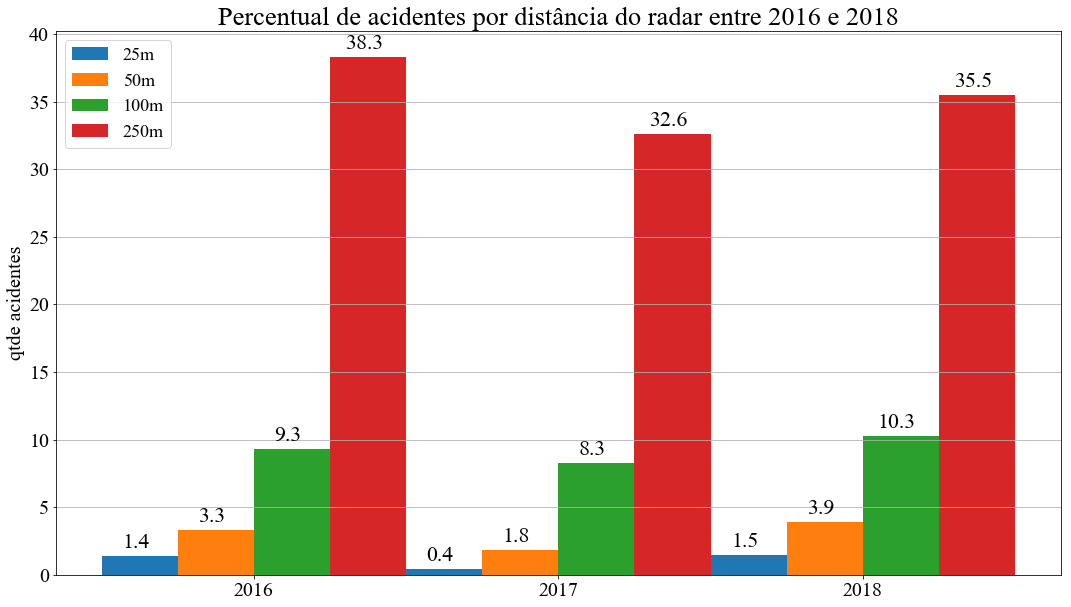

In [167]:
fig,ax_bar = plt.subplots()#(111)
ax_bar.figure.set_size_inches(18,10)
bar_width=0.25
x = np.arange(len(acidentes_sum))
rects1 = ax_bar.bar(x-0.375,acidentes_perc['25m'],label='25m',width=bar_width)
rects2 = ax_bar.bar(x-0.125,acidentes_perc['50m'],label='50m',width=bar_width)
rects3 = ax_bar.bar(x+0.125,acidentes_perc['100m'],label='100m',width=bar_width)
rects4 = ax_bar.bar(x+0.375,acidentes_perc['250m'],label='250m',width=bar_width)
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(('2016','2017','2018'))
plt.ylabel('qtde acidentes')
plt.legend(loc='upper left')
plt.title('Percentual de acidentes por distância do radar entre 2016 e 2018')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax_bar.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 4, height),
                       xytext=(15,3),
                       textcoords='offset points',
                       ha='center',va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.savefig('acidentes-bar-2016-2018-perc-250m.png', format='png', dpi=200)
plt.draw()